# A simple Multiple Layers Perceptron as Classifier
by Sio-Song Ieng, Dominique Gruyer, Wei Xu and Alexandre Jacquemart

## Introduction

The very simple neural network we introduced in the first practical work is linear classifier. For given input $\mathbf{X} = (x_1,\dots,x_D)$, the output will be 1 if the linear model $z=\sum_{i=1}^D w_i x_i + b>0$ and 0 if $z=\sum_{i=1}^D w_i x_i + b \le 0$. The decision is made by looking at the position of the point $(\mathbf{X}, y)$ versus the hyperplane $\sum_{i=1}^D w_i x_i + b = 0$. In this work, we will see how a multiple layers network will be able to classify data when the classes are not separated (it will be the general case) by a hyperplane.
However, we will first look at the linear model and then the generalised model by modifying the linear one.

## Non linear dataset
The main idea of the neural network is using parameterized mapping from input data to label scores. This is what we already done with logistic regression with two classes. We will now looking at a toy dataset with 3 categories. We will first generate the dataset that is not linearly separable. Please, look at the following cell for the dataset generation code. Here is the $x$ array:

|  column of $x_1$ |  Column of  $x_2$ |
|-------------------------------------------|-------------------------------------------|
| columns of 100 data points of class 0 : $x_1$  | columns of 100 data points of class 0 : $x_2$ |
| columns of 100 data points of class 1 : $x_1$  | columns of 100 data points of class 1 : $x_2$ |
| columns of 100 data points of class 2 : $x_1$  | columns of 100 data points of class 2 : $x_2$ |

and the $y$ array:

|index of class|
|--------------|
|columns of 100 indices of the first class: 0|
|columns of 100 indices of the first class: 1|
|columns of 100 indices of the first class: 2|



In the first step, you need to split the dataset into training set and validation set. We will here forget the test set. Before doing that, we need to understand how the dataset was generated: there is a loop on the number of the classes and the index of the data is computed by **ix = range(N*j, N*(j+1))** and all the data points are stored with respect to this index in the array **X**. Thus, the data of the 3 classes are stored in the same array. How to select the $i^{th}$ class? Furthermore, the data points are created using the parameter t and **t = linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2**. The data points of a given class $i$ are then stored in the increasing order of $t$ with a small random perturbation. In our network training, we need to preprocess the raw dataset in order to have a training set with examples that should be not too closed to each other.
To split properly the dataset, you cannot select for instance the $70$ first examples of each class for the training set and the $30$ data points left for the validation set because the $30$ data point left for each class might be too far from the training set and the validation will not be efficient enough. 

The good way to split the dataset is to randomly pick $70$ data points in each class for the training set and the $30$ data points left for the validation set. To do this we can use the methods **numpy.random.choice** and **numpy.setdifferent1d**. 
Let us store the training set and the validation set in these arrays: trainVal, trainY, validationVal and validationY. 

## The linear network
In our first experimentation, we will compute a linear network to classify data from 3 classes. To determine how will be the network: number of layers, number of nodes and the non linear function.
It is time now to look at the structure of the network. In the dataset section, some quantity parameters are defined: 

* $N = 100$ is the number of data per class
* $D = 2$ is the dimensionality of each input data
* $K = 3$ is the number of classes

In the linear model as it was the case for the logistic regression, we only have the input layer and the ouput layer. This knowledge will provide us with the size of the matrix $\mathbf{W}$ and the vector $\mathbf{b}$. The first task is to decide what are the sizes of these matrix and vector. In our exercice, you will decide the size in the next cell.


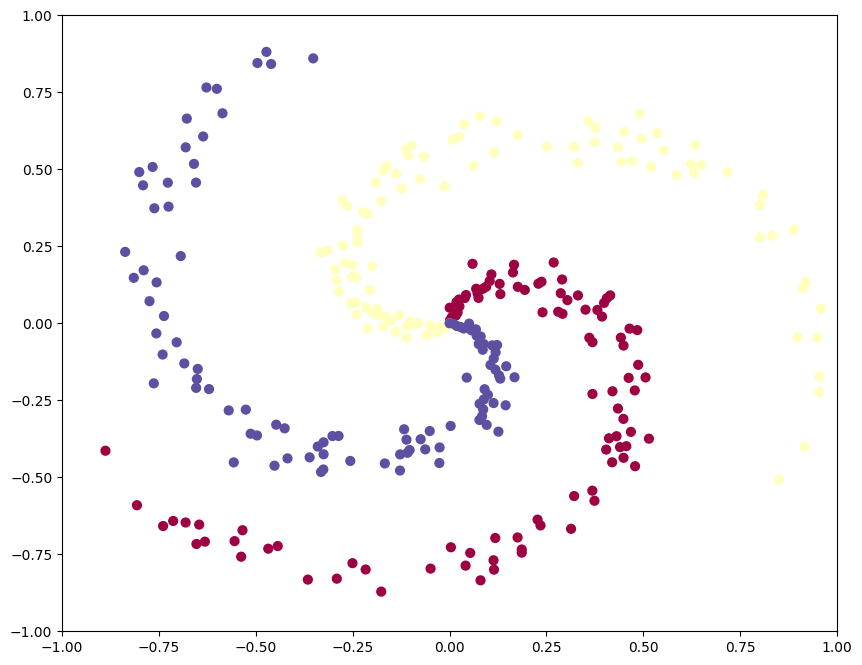

In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

#Data splitting for training set, and validation set
nbTrain = 70
#Sorting data index for training set
##For the first category
ix = range(0, 100)
idTrain0=np.random.choice(ix,nbTrain,replace=False)
idVal0 = np.setdiff1d(ix,idTrain0)
##For the second category
ix = range(100, 200)
idTrain1=np.random.choice(ix,nbTrain,replace=False)
idVal1 = np.setdiff1d(ix,idTrain1)
##For the third category
ix = range(200, 300)
idTrain2=np.random.choice(ix,nbTrain,replace=False)
idVal2 = np.setdiff1d(ix,idTrain2)

idTrain = np.append(idTrain0, idTrain1)
idTrain = np.append(idTrain, idTrain2)
ideVal = np.append(idVal0, idVal1)
ideVal = np.append(ideVal, idVal2)

trainVal=X[idTrain]
eValVal=X[ideVal]
trainY = y[idTrain]
eValY = y[ideVal]

#The Network structure

# initialize parameters randomly
#your code
#W = #your code
#b = #your code
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

## Training the network

### Softmax function for multiclasses classifier
With logistic regression, the trained network will be able to classify data from two categories. When we have more categories than 2, we can use other kind of loss function. Softmax is the genralised function for the logistic function: $$ \sigma_j(z)= \frac{e^{z_j}}{\sum_{k=0}^{c-1} e^{z_k}}$$ where $c$ is the number of categories and $z_j =\sum_{i=0}^D w_{j,i}x_i +b_j$.

Looking at the expression, we see that: $$P(y_i|\mathbf{X_i}; W)=\sigma_{y_i}(z) = \frac{e^{z_{y_i}}}{\sum_{k=0}^{c-1} e^{z_k}}$$
can be interpreted as the (normalized) probability assigned to the correct label 
$y_i$ given the image $\mathbf{x_i}$ and parameterized by $\mathbf{W}$.

The loss function for the softmax function is:
$$J(\mathbf{W}; b) = \frac{-1}{N}\sum_{i=1}^N \sum_{k=0}^{c-1} y_{i,k} log(\frac{e^{z_{y_{i,k}}}}{\sum_{l=0}^{c-1} e^{z_{i,l}}}) $$
where $N$ is the number of example.
In the probabilistic interpretation, we are therefore minimizing the negative log likelihood of the correct class,
which can be interpreted as performing Maximum Likelihood Estimation (MLE). In the last equation, make sur that you understand that if the class index $iy_i=0$ then $y_{i,0}=1, y_{i,1}=0, y_{i,2}=0$, if $iy_i=1$ then $y_{i,0}=0, y_{i,1}=1, y_{i,2}=0$ and if $iy_i=2$, then $y_{i,0}=0, y_{i,1}=0, y_{i,2}=1$

### Gradient computation
The main procedure in network training is the gradient decrease method. We will here compute the gradient of the softmax function. Let $k$ be the index of the class, $k=0,\dots,c-1$ the derivative of the sigmoid function $f_k$ with respect to the parameter $z_j, j=0,\dots,c-1$ is:

$$\frac{\partial{\sigma_k(z)}}{\partial{z_j}} =\frac{\partial{\frac{e^{z_k}}{\sum_{l=0}^{c-1} e^{z_l}}}}{\partial{z_j}}$$

For $l=k$, the derivative $\frac{\partial{\sigma_k(z)}}{\partial{z_l}} = \sigma_k(z)(1-\sigma_k(z))$ and if $l \ne k,\frac{\partial{\sigma_k(z)}}{\partial{z_l}} = -\sigma_k(z)\sigma_l(z)$. 
Then, $$\frac{\partial{J}}{\partial{z^{(I)}_j}} = \frac{-1}{N}\sum_{i=1}^N \sum_{k=0}^{c-1} y^{i}_k \frac{\partial{log(\sigma_k(z))}}{\partial{z^{(I)}_j}}$$
    $$\frac{\partial{J}}{\partial{z^{(I)}_j}} =  \frac{1}{N}\sum_{k=0, k\ne j}^{c-1} y^{(I)}_k \sigma_k(z^{(I)})\sigma_j(z^{(I)})\frac{1}{\sigma_k(z^{(I)})}-\frac{y^{(I)}_j}{N} \sigma_j(z^{(I)})(1- \sigma_j(z^{(I)}))\frac{1}{\sigma_j(z^{(I)})}=\sigma^{(I)}_j- y^{(I)}_j$$
    
The derivative of $J$ with respect to $w_{u,v}$ is:
$$\frac{\partial{J}}{\partial{w_{u,v}}} =  \frac{1}{N}\sum_{i=1}^N \frac{\partial{J}}{\partial{z^{(i)}_u}} \frac{\partial{z^{(i)}_u}}{\partial{w_{u,v}}}$$
As it is defined, $z^{(i)}_u=\sum_{l=1}^Dw_{u,l}x^{(i)}_l$, we have $\frac{\partial{z^{(i)}_u}}{\partial{w_{u,v}}} = x^{(i)}_v$ then:
$$\frac{\partial{J}}{\partial{w_{u,v}}} = \frac{1}{N} \sum_{i=1}^N (\sigma^{(i)}_u - y^{(i)}_u)x^{(i)}_v$$


Finally, we need to compute $\frac{\partial{J}}{\partial{b_u}}$ and the derivative si very similare to $\frac{\partial{J}}{\partial{w_{u,v}}}$: 
$$\frac{\partial{J}}{\partial{b_u}}= \frac{1}{N} \sum_{i=1}^N (\sigma^{(i)}_u - y^{(i)}_u)$$

Now you can fill the gabs of the function softmax_loss and the training method.



In [19]:
def softmax_loss(W, b, X, y, reg):
    """ 
Inputs:
  - W: A numpy array of shape (?, ?) containing weights.
  - b: A numpy arrau of shape (?, ?) containing bias
  - X: A numpy array of shape (N, D) containing a minibatch of data.
  - y: A numpy array of shape (N,) containing training labels; y[i] = k means
    that X[i] has label k, where 0 <= k < C-1.
  - reg: (float) regularization strength   
  Returns a tuple of:
  - loss as single float
  - gradient with respect to weights W and b; arrays of same shape as W and b respectively
    """
# Initialize the loss and gradient to zero.
    loss = 0.0
    num_train = X.shape[0]
  # evaluate class scores, [N x K]
    scores = np.dot(X,W)+b

  # compute the class probabilities
    exp_scores = np.exp(scores)
    #one line
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    correct_logprobs = -np.log(probs[range(num_train),y])
# compute the loss: average cross-entropy loss and regularization
    data_loss = np.sum(correct_logprobs)/num_train
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
  # compute the gradient on scores
    dscores = probs 
    dscores[range(num_train),y] -= 1
    dscores /= num_train
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg*W # regularization gradient
    return loss, dW, db

In [20]:
def train(W, b, X, y, nbIter):
    """
    Train this neural network using stochastic gradient descent.
     Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    """
    # some hyperparameters
    learning_rate = 1e-0
    reg = 1e-3 # regularization strength

# gradient descent loop
    for i in range(nbIter):
        #your code for the loss computation
        loss, dW, db = softmax_loss(W, b, X, y, reg)

        if i % 10 == 0:
            print ("iteration ",i, "loss ", loss)
    
        # perform a parameter update
        W += -learning_rate * dW
        b += -learning_rate * db
    return W, b

In [21]:
#call training
W, b = train(W, b, trainVal, trainY, 1000)

# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

iteration  0 loss  1.0966944504263658
iteration  10 loss  0.9163235335446934
iteration  20 loss  0.8502095529838055
iteration  30 loss  0.8207345867838028
iteration  40 loss  0.8057498569744349
iteration  50 loss  0.7974441327715025
iteration  60 loss  0.792558452688475
iteration  70 loss  0.7895591477870231
iteration  80 loss  0.7876584327065362
iteration  90 loss  0.786424285771556
iteration  100 loss  0.7856075905435564
iteration  110 loss  0.785058935404294
iteration  120 loss  0.7846858522475828
iteration  130 loss  0.7844296439120115
iteration  140 loss  0.7842522697372358
iteration  150 loss  0.784128651127973
iteration  160 loss  0.7840420186036344
iteration  170 loss  0.7839810252973998
iteration  180 loss  0.7839379169913403
iteration  190 loss  0.7839073502715976
iteration  200 loss  0.7838856170578232
iteration  210 loss  0.7838701288102199
iteration  220 loss  0.7838590694301041
iteration  230 loss  0.7838511593291675
iteration  240 loss  0.7838454936764363
iteration  250 

(-1.8712034092398278, 1.8687965907601756)

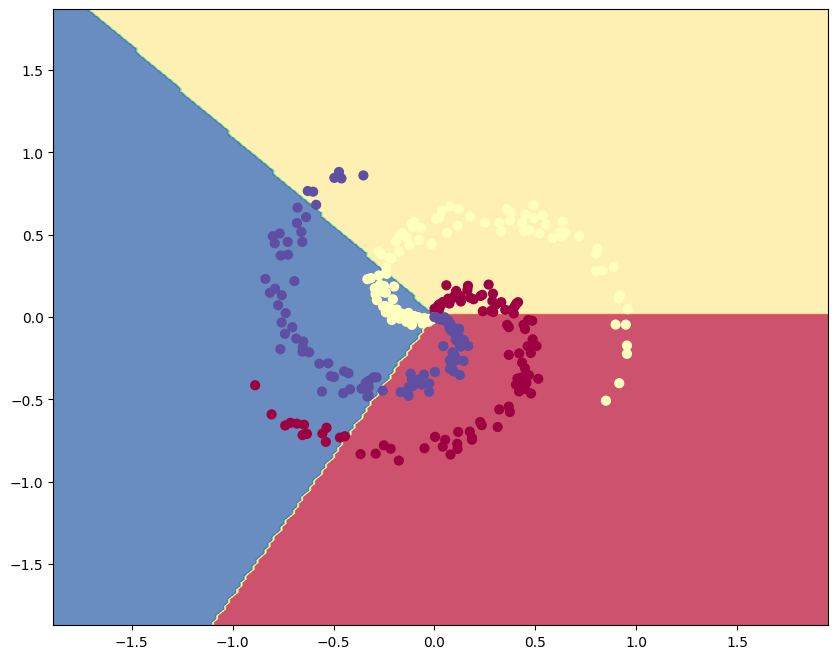

In [22]:
ho = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, ho),
                     np.arange(y_min, y_max, ho))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Multi-layers nerwork
The result of the training show that the data points of the three classes are not properly classified. This is an expected result because the linear network can only estimate hyperplans as boundaries of data. Our dataset is not linearly separable. To classify such kind of data, the solution is to use hidden layer with combination of linear function and non linear one. In our exercice, we will use one hidden layer. Let's use $H=100$ nodes for our exercice.
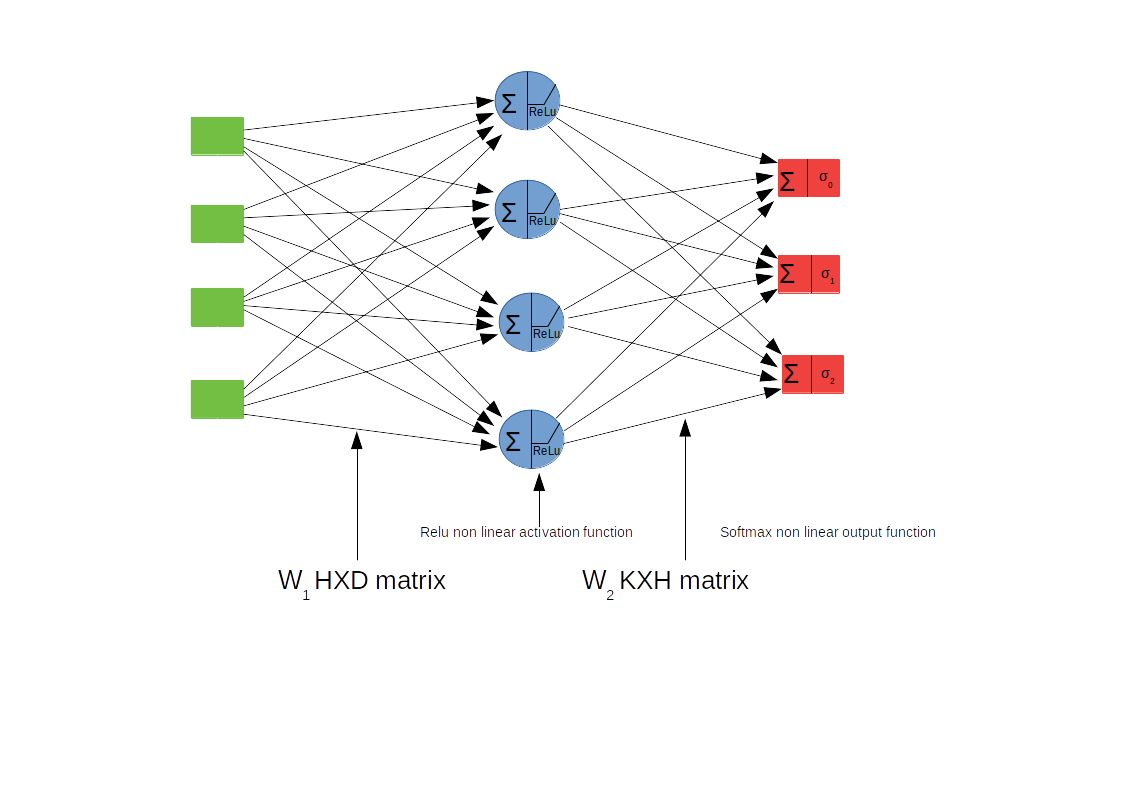

For the hidden layer, we compute the first $H \times D$ matrix $W_1$ and the the non linear function that can be logistical function or others. In this exercice, we will use ReLu function. For the output layer, we compute the $K \times H$ matrix $W_2$ and the non linear function that could be a softmax function for $3$ classes in our exemple. The graph in the figure is just a representation. In your code, a layer is a couple of matrix $\mathbf{W_i}$ and non linear function. In our example, a new function is used, the ReLU standing for Rectified Linear Unit:
\begin{equation}
    ReLU(x) =
    \begin{cases}
        x & \text{if $x>0$,}\\
        0 & \text{otherwise.}
    \end{cases}
\end{equation}
The derivative of this function is:
\begin{equation}
    ReLU'(x) =
    \begin{cases}
        1 & \text{if $x>0$,}\\
        0 & \text{otherwise.}
    \end{cases}
\end{equation}
### Backpropagation
This is the most important part of the deep learning approach. The key of the approach is to used the gradient method to minimize the loss function. However when the neural network is very deep, you will have a function that is composed of functions, as many as the number layers. The backpropagation is the neat approach to compute properly the gradient.
We recall here the main equations for the backpropagation at the layer $l$:
$$\frac{\partial{J}}{\partial{Z^{[l]}}}=\frac{\partial{J}}{\partial{A^{[l]}}} g′(Z^{[L]}), \text{where $g$ is the activation function and this is a element-wise product}$$
$$\frac{\partial{J}}{\partial{W^{[l]}}}=\frac{1}{N} \frac{\partial{J}}{\partial{Z^{[l]}}}^T A^{[l−1]}$$

$$\frac{\partial{J}}{\partial{b^{[l]}}}=\frac{1}{N}\sum_{i=1}^N \frac{\partial{J}}{\partial{Z^{[l](i)}}}$$

$$\frac{\partial{J}}{\partial{A^{[l-1]}}}=\frac{\partial{J}}{\partial{Z^{[l]}}}W$$



In [23]:
# initialize parameters randomly
h = 100 # size of hidden layer
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [24]:
def softmaxMLP(W1, b1, W2, b2, X, y, reg):

    # Initialize the loss and gradient to zero.
    loss = 0.0  
    num_train = X.shape[0]
    # evaluate class scores, [N x K]
    #first layer
    score1 = np.dot(X,W1)+b1
    hidden_layer = np.maximum(0, score1) # note, ReLU activation
    #hidden layer
    scores = np.dot(hidden_layer,W2)+b2
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    #loss computation
    correct_logprobs = -np.log(probs[range(num_train),y])
    data_loss = np.sum(correct_logprobs)/num_train
    
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    #backpropagation

    # compute the gradient on scores
    #derivative of softmax the first equation
    dscores = probs
    dscores[range(num_train),y] -= 1
    dscores /= num_train
    
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    #this is the second equation
    dW2 = np.dot(hidden_layer.T, dscores)
    #the third equation
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer the fourth equation so we pass to the hidden layer
    dhidden = np.dot(dscores, W2.T)
    
    # backprop the ReLU non-linearity derivative of the activation function first equation
    dhidden = dhidden * (hidden_layer > 0)
    # finally into W,b
    #the second equation
    dW1 = np.dot(X.T, dhidden)
    #the third equation
    db1 = np.sum(dhidden, axis=0, keepdims=True)
    #no fourth equation because only one hidden layer
    
    # add regularization gradient contribution
    dW2 += reg * W2
    dW1 += reg * W1
    return loss, dW2, db2, dW1, db1

In [25]:
def trainMLP(W1, b1, W2, b2, X, y, nbIter):
    """
    Train this neural network using stochastic gradient descent.
     Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    """
    # some hyperparameters
    learning_rate = 1e-0
    reg = 1e-3 # regularization strength

# gradient descent loop
    for i in range(nbIter):
        loss, dW2, db2, dW1, db1 = softmaxMLP(W1, b1, W2, b2, X, y, reg)
        
        if i %1000 == 0:
            print ("iteration ",i, "loss ", loss)
    
          # perform a parameter update
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1 
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
    return W1, b1, W2, b2

Now you can train the MLP network!

In [26]:
#call training
W1, b1, W2, b2 = trainMLP(W1, b1, W2, b2, trainVal, trainY, 10000)

# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(trainVal, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == trainY)))

iteration  0 loss  1.109016274043924
iteration  1000 loss  0.23296643272049988
iteration  2000 loss  0.20435781758860788
iteration  3000 loss  0.19809762112498644
iteration  4000 loss  0.1957808519041801
iteration  5000 loss  0.19287240960801394
iteration  6000 loss  0.1914839136299207
iteration  7000 loss  0.19087485146928312
iteration  8000 loss  0.19033850009140577
iteration  9000 loss  0.19011119738256363
training accuracy: 0.99


(-1.8712034092398278, 1.8687965907601756)

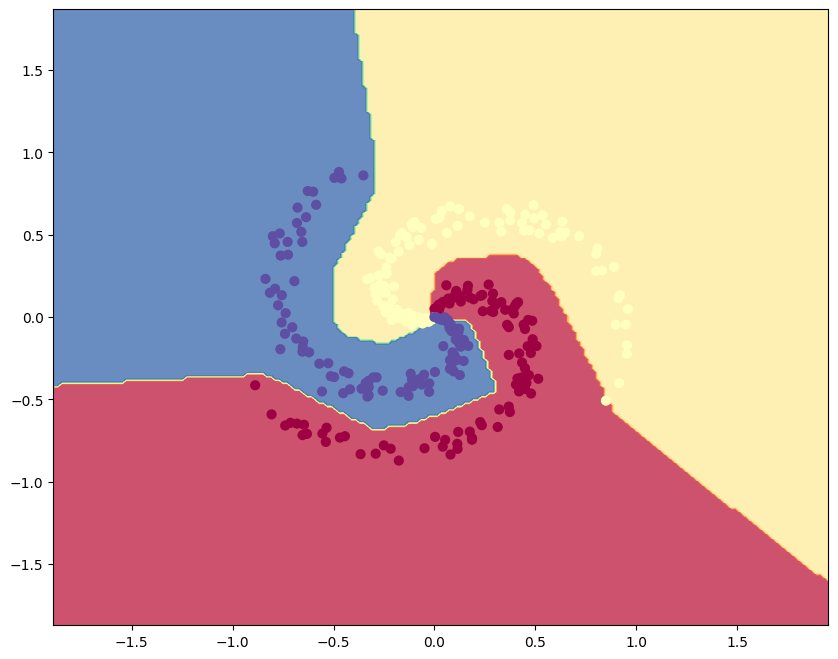

In [27]:
# plot the resulting classifier
ho = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, ho),
                     np.arange(y_min, y_max, ho))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

In [29]:
#The validation step
# evaluate validation set accuracy
hidden_layer = np.maximum(0, np.dot(eValVal, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
#printing the validation accuracy
print ('validation accuracy: %.2f' % (np.mean(predicted_class == eValY)))

validation accuracy: 0.96
